# 8-1. 합성곱 신경망의 구성 요소(p.422)

## 합성곱
- 입력 데이터 위를 작은 창(필터 또는 커널)이 이동하면서 연산을 수행하는 방식. 이 필터는 정해진 크기의 가중치(예: w1, w2, w3)를 가지고 있고, 입력의 일부 구간과 곱한 뒤 그 결과를 더해 하나의 출력을 만듦.
- 밀집층은 입력 전체에 각각 다른 가중치를 곱해서 출력을 내지만,
- 합성곱은 동일한 가중치 집합(필터)을 공유하면서 입력을 조금씩 이동하며 출력값을 만든다.
---
- 커널: 입력에 곱하는 가중치 의미
- 필터: 뉴런 개수 표현시 사용
---
- 특성 맵: 합성곱 계산을 통해 얻은 출력. 여러 개의 필터를 사용하면 3차원 배열이 될 수 있다.(합성곱 층에 있는 필터의 가중치(커널)도 모두 다르다)
- 실제 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만, 2차원 형태를 유지하는 점이 다르다. 또한 입력보다 훨씬 작은 크기의 커널을 사용하고, 입력 위를 이동하면서 2차원 특성 맵을 만든다. 이렇게 2차원 구조를 그대로 사용하므로, 이미지 처리 분야에서 뛰어난 성능을 발휘한다.

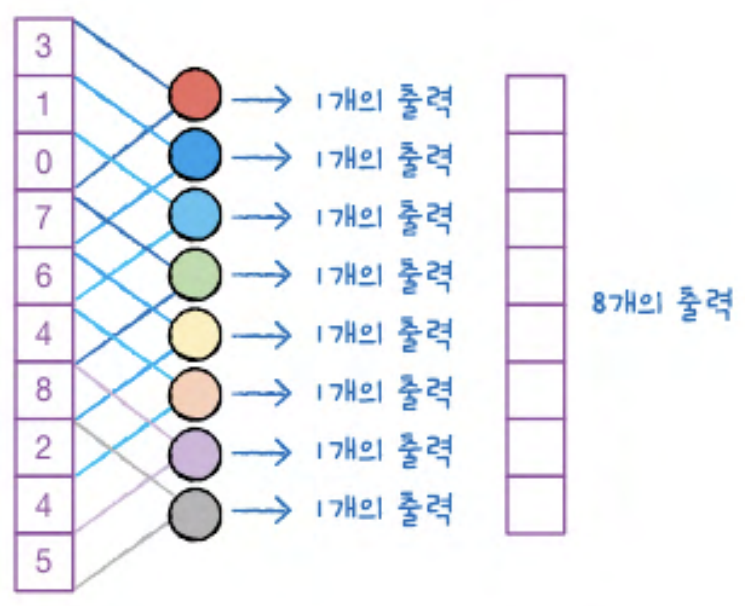

## 케라스 합성곱 층
입력 위를 이동하는 합성곱은 Conv2D 클래스로 제공.

Conv2D 클래스의 첫번째 매개변수는 필터의 개수. kernel_size 매개변수는 필터에 사용할 커널의 크기를 지정(반드시 지정), 활성화함수 지정.

In [2]:
from tensorflow import keras
keras.layers.Conv2D(10, # 필터의 개수
                    kernel_size=(3, 3), # 필터에 사용할 커널의 크기를 지정
                    activation='relu') # 활성화함수 지정

<Conv2D name=conv2d, built=False>

**합성곱 신경망**: 1개 이상의 합성곱 층을 쓴 인공신경망.

- **패딩**: 입력 배열의 주위를 가상의 원소로 채우는 것. 실제 입력값이 아니므로 패딩은 0으로 채움. 계산에 영향을 미치지는 않고, 커널이 도장을 찍을 횟수를 늘려주는 역할만 함. 모서리의 중요한 정보가 특성 맵에 잘 전달되지 않고, 가운데 정보가 두드러지게 표현되는 것을 막음.
    - 세임 패딩: 입력과 특성 맵의 크기를 동일하게(입력과 특성 맵의 가로세로 크기가 같게) 만들기 위해 입력 주위에 0으로 패딩 하는 것.
    - 밸리드 패딩: 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우.
- **스트라이드**: 이동의 크기. 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 튜플을 사용해 각각 지정할 수 있음. 보통 기본값(1, 1)을 그대로 사용. 커널 이동 크기를 가로세로 다르게 지정하는 경우도 거의 없음.

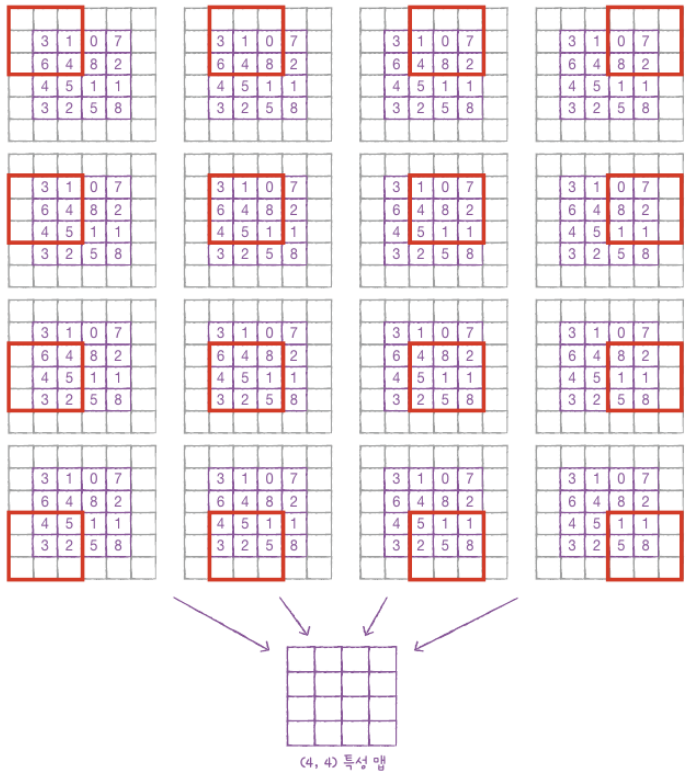

In [3]:
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same', strides=1)

<Conv2D name=conv2d_1, built=False>

- **풀링**: 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할. *특성 맵의 개수를 줄이지는 않음*. (특성 맵에 커널 없는 필터를 적용하는 것과 비슷한 개념)
    - 입력 위를 지나가면서 도장을 찍음, 가중치가 없고 가장 큰 값(최대 풀링) 또는 평균값(평균 풀링)을 고름.
    - 합성곱 층과 뚜렷이 구분되므로 풀링 층이라 부름.
    - 풀링에서는 풀링 크기가 스트라이드와 같다(즉, 겹치지 않고 이동한다).
    - 케라스에서는 MaxPooling2D/AveragePooling2D 클래스로 풀링 수행. 보통 최대 풀링 사용: 평균 풀링은 특성 맵에 있는 중요한 정보를 (평균하여) 희석시킬 수 있기 때문.
    - 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다, 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 냄.

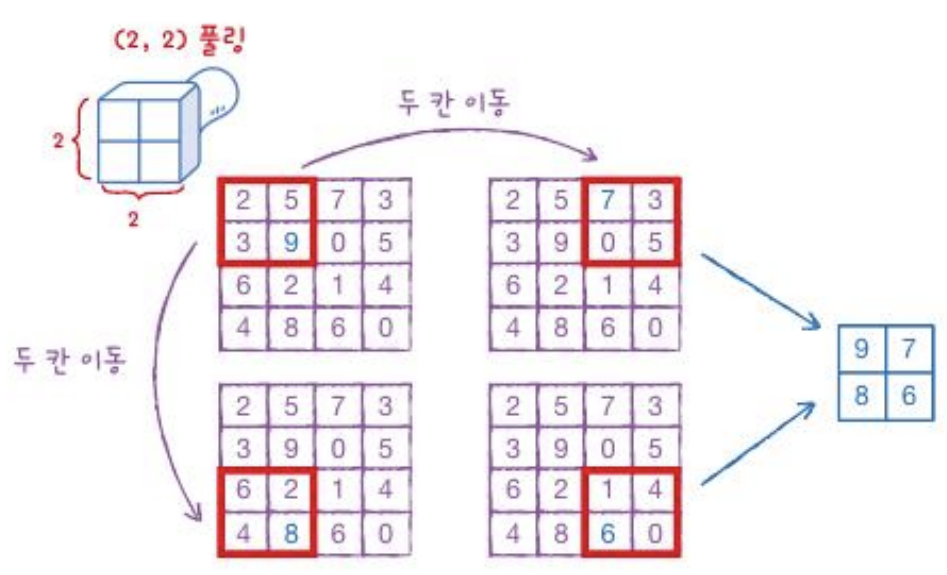

In [4]:
keras.layers.MaxPooling2D(2) # 풀링의 크기(대부분 2: 가로세로 크기를 절반으로 줄임)

<MaxPooling2D name=max_pooling2d, built=True>

In [5]:
keras.layers.MaxPooling2D( # 평균 풀링은 AveragePooling2D
    2,
    strides=2, # 자동으로 풀링의 크기와 같으므로 따로 지정할 필요 없음
    padding='valid') # 패딩의 기본값. 패딩을 하지 않으므로 이를 바꾸는 경우는 거의 없다.

<MaxPooling2D name=max_pooling2d_1, built=True>

## 합성곱 신경망의 전체 구조
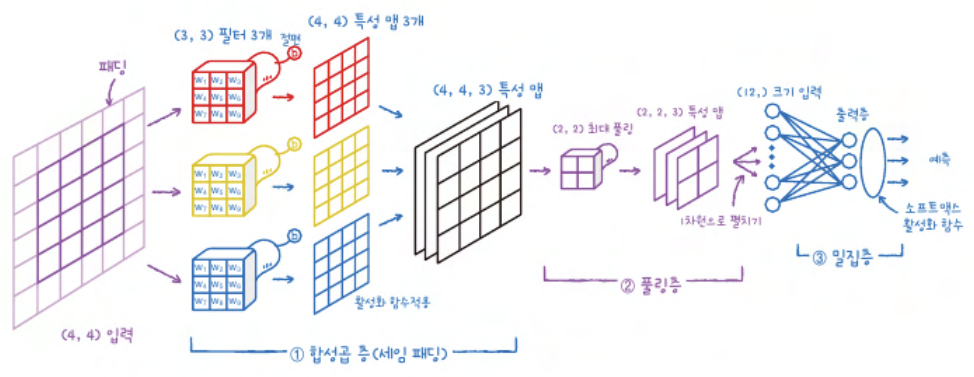

0️⃣ 세임 패딩->1픽셀 추가됨(텐서플로에서 자동으로 추가)

1️⃣ 커널 크기 (3, 3), 합성곱의 필터 3개-가중치 서로 다름. 합성곱 스트라이드는 별도 설정 없으면 1. -> 특성 맵은 입력과 동일한 (4, 4)로 만들어짐. -> 활성화함수 적용, (4, 4, 3)

2️⃣ 보통 (2, 2) 풀링으로 특성 맵의 가로세로 크기를 절반으로 줄임 -> (2, 2, 3).

3️⃣ 밀집층인 출력층에 전달하려면, 2️⃣의 3차원 배열을 1차원으로 펼쳐야 함-12개의 원소를 가진 1차원 배열로 만들어, 출력층의 입력으로 사용.  
출력층에는 3개의 뉴런을 둠 = 3개의 클래스를 분류하는 다중 분류 문제.  
출력층에서 계산된 값은 소프트맥스 활성화 함수를 거쳐 최종 예측 확률이 됨.

## 컬러 이미지를 사용한 합성곱
컬러이미지는 RGB(빨강, 초록, 파랑) 채널로 구성되어 있기 때문에 3차원 배열로 표시. (너비, 높이, 깊이)  

커널 배열의 깊이는 항상 입력의 깊이와 같다.

(4, 4, 3)의 입력에 대해 필터의 커널 크기가 (3, 3, 3)이면, 27개 원소에 27개의 가중치를 곱하고 절편을 더하는 식이 됨. -> 입력이나 필터의 차원이 몇 개인지와 상관없이, 항상 출력은 하나.

**1️⃣ 합성곱 층-2️⃣ 풀링 층-3️⃣ 합성곱 층의 순서인 경우**: RGB 이미지의 경우

1️⃣ (8, 8, 3) 입력+세임 패딩 - 필터 커널 크기 (3, 3, 3)*5개 -> 특성맵 크기 (8, 8, 5)

2️⃣ (2, 2) 풀링 -> 특성 맵 크기 (4, 4, 5)

3️⃣ (4, 4, 5) 입력 -> 필터 커널 크기 (3, 3, 5)*10개 -> 특성 맵 크기 (2, 2, 10)

--> 이럴게 합성곱 신경망은 너비와 높이는 점점 줄어들고, 깊이는 점점 깊어지는 것이 특징.



# 8-2. 합성곱 신경망을 사용한 이미지 분류(p.444)

- 케라스 API를 사용해 패션 MNIST 데이터를 불러오고 전처리
    - 데이터 스케일 0-255 사이에서 0-1 사이로 바꾸기
    - 훈련 세트와 검증 세트로 나누기
- 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 했음: 넘파이 reshape() 메서드 또는 Flatten 클래스.
- 합성곱 신경망은 2차원 이미지를 그대로 사용하므로 일렬로 펼치지 않음. 단 항상 깊이(채널) 차원이 있어야 함. Conv2D층을 사용하기 위해 이 채널 차원을 추가해야 함. 넘파이 reshape() 메서드로 전체 배열 차원을 그대로 유지하면서 마지막에 차원 간단히 추가 가능.


In [6]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
# train_input(48000, 28, 28)에서 train_scaled(48000, 28, 28, 1) 크기가 됨

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 합성곱 신경망 만들기
전형적인 합성곱 신경망 구조: 합성곱 층으로 이미지에서 특징 감지 -> 밀집층으로 클래스에 따른 분류 확률 계산.

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, # 32개 필터
                              kernel_size=3, # 커널 크기 (3, 3)
                              activation='relu',
                              padding='same', # 세임 패딩
                              input_shape=(28, 28, 1))) # 첫 번째 층에서 입력의 차원을 지정함

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[첫 번째 합성곱-풀링 층]

1️⃣ 입력 (28, 28) 크기에 세임 패딩 적용, 32개 필터 -> 출력된 특성맵의 가로세로 크기 같음

2️⃣ (2, 2) 풀링 적용하여, 특성맵 크기 절반으로 줄어듦, 깊이는 32. (14, 14, 32)


In [8]:
model.add(keras.layers.MaxPooling2D(2))
# 풀링 층 추가, 전형적 풀링 크기 (2, 2). 가로세로 크기 같으면 정수 하나로 지정 가능

[두 번째 합성곱-풀링 층]

3️⃣ 입력 (14, 14, 32) 크기에 필터 64개, 세임 패딩

4️⃣ (2, 2) 풀링 -> (7, 7, 64)

In [9]:
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

[3차원 특성 맵을 일렬로 펼치기]

In [10]:
model.add(keras.layers.Flatten()) # 특성 맵을 일렬로 펼치고
model.add(keras.layers.Dense(100, activation='relu')) # 중간의 하나의 밀집 은닉층(Dense)를 두고
model.add(keras.layers.Dropout(0.4)) # 드롭아웃으로 은닉층의 과대적합을 막고
model.add(keras.layers.Dense(10, activation='softmax')) # Dense 출력층에 전달. 다중분류이므로 소프트맥스.

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

[파라미터 개수 계산]

- 첫 번째 합성곱 층: 32개 필터, 크기 (3, 3), 깊이 1, 필터마다 하나의 절편. 3x3x1x32+32 = 320
- 두 번째 합성곱 층: 64개 필터, 크기 (3, 3), 깊이 32, 필터마다 하나의 절편.  3x3x1x64+64 = 18,496
- Flatten 클래스에서 (7, 7, 64) 크기 특성맵을 1차원 배열로 펼치면(7x7x64) (3136,) 크기의 배열이 됨,
- 이를 100개 뉴런과 완전히 연결해야 하므로, 은닉층의 모델 파라미터 개수는 3,136x100+100 = 313,700개.


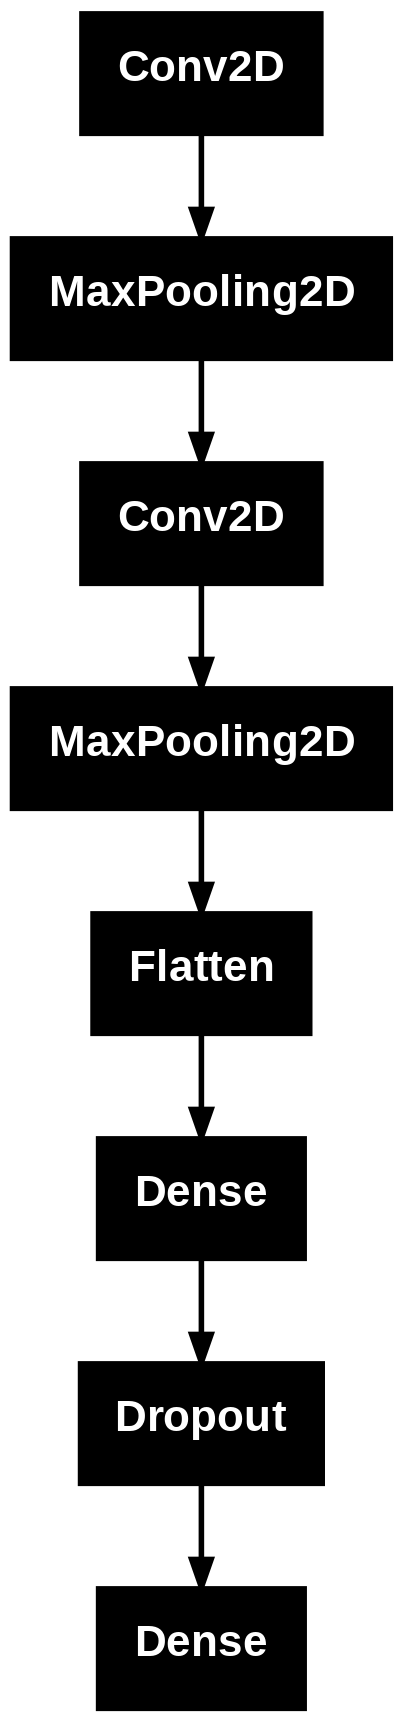

In [12]:
keras.utils.plot_model(model)

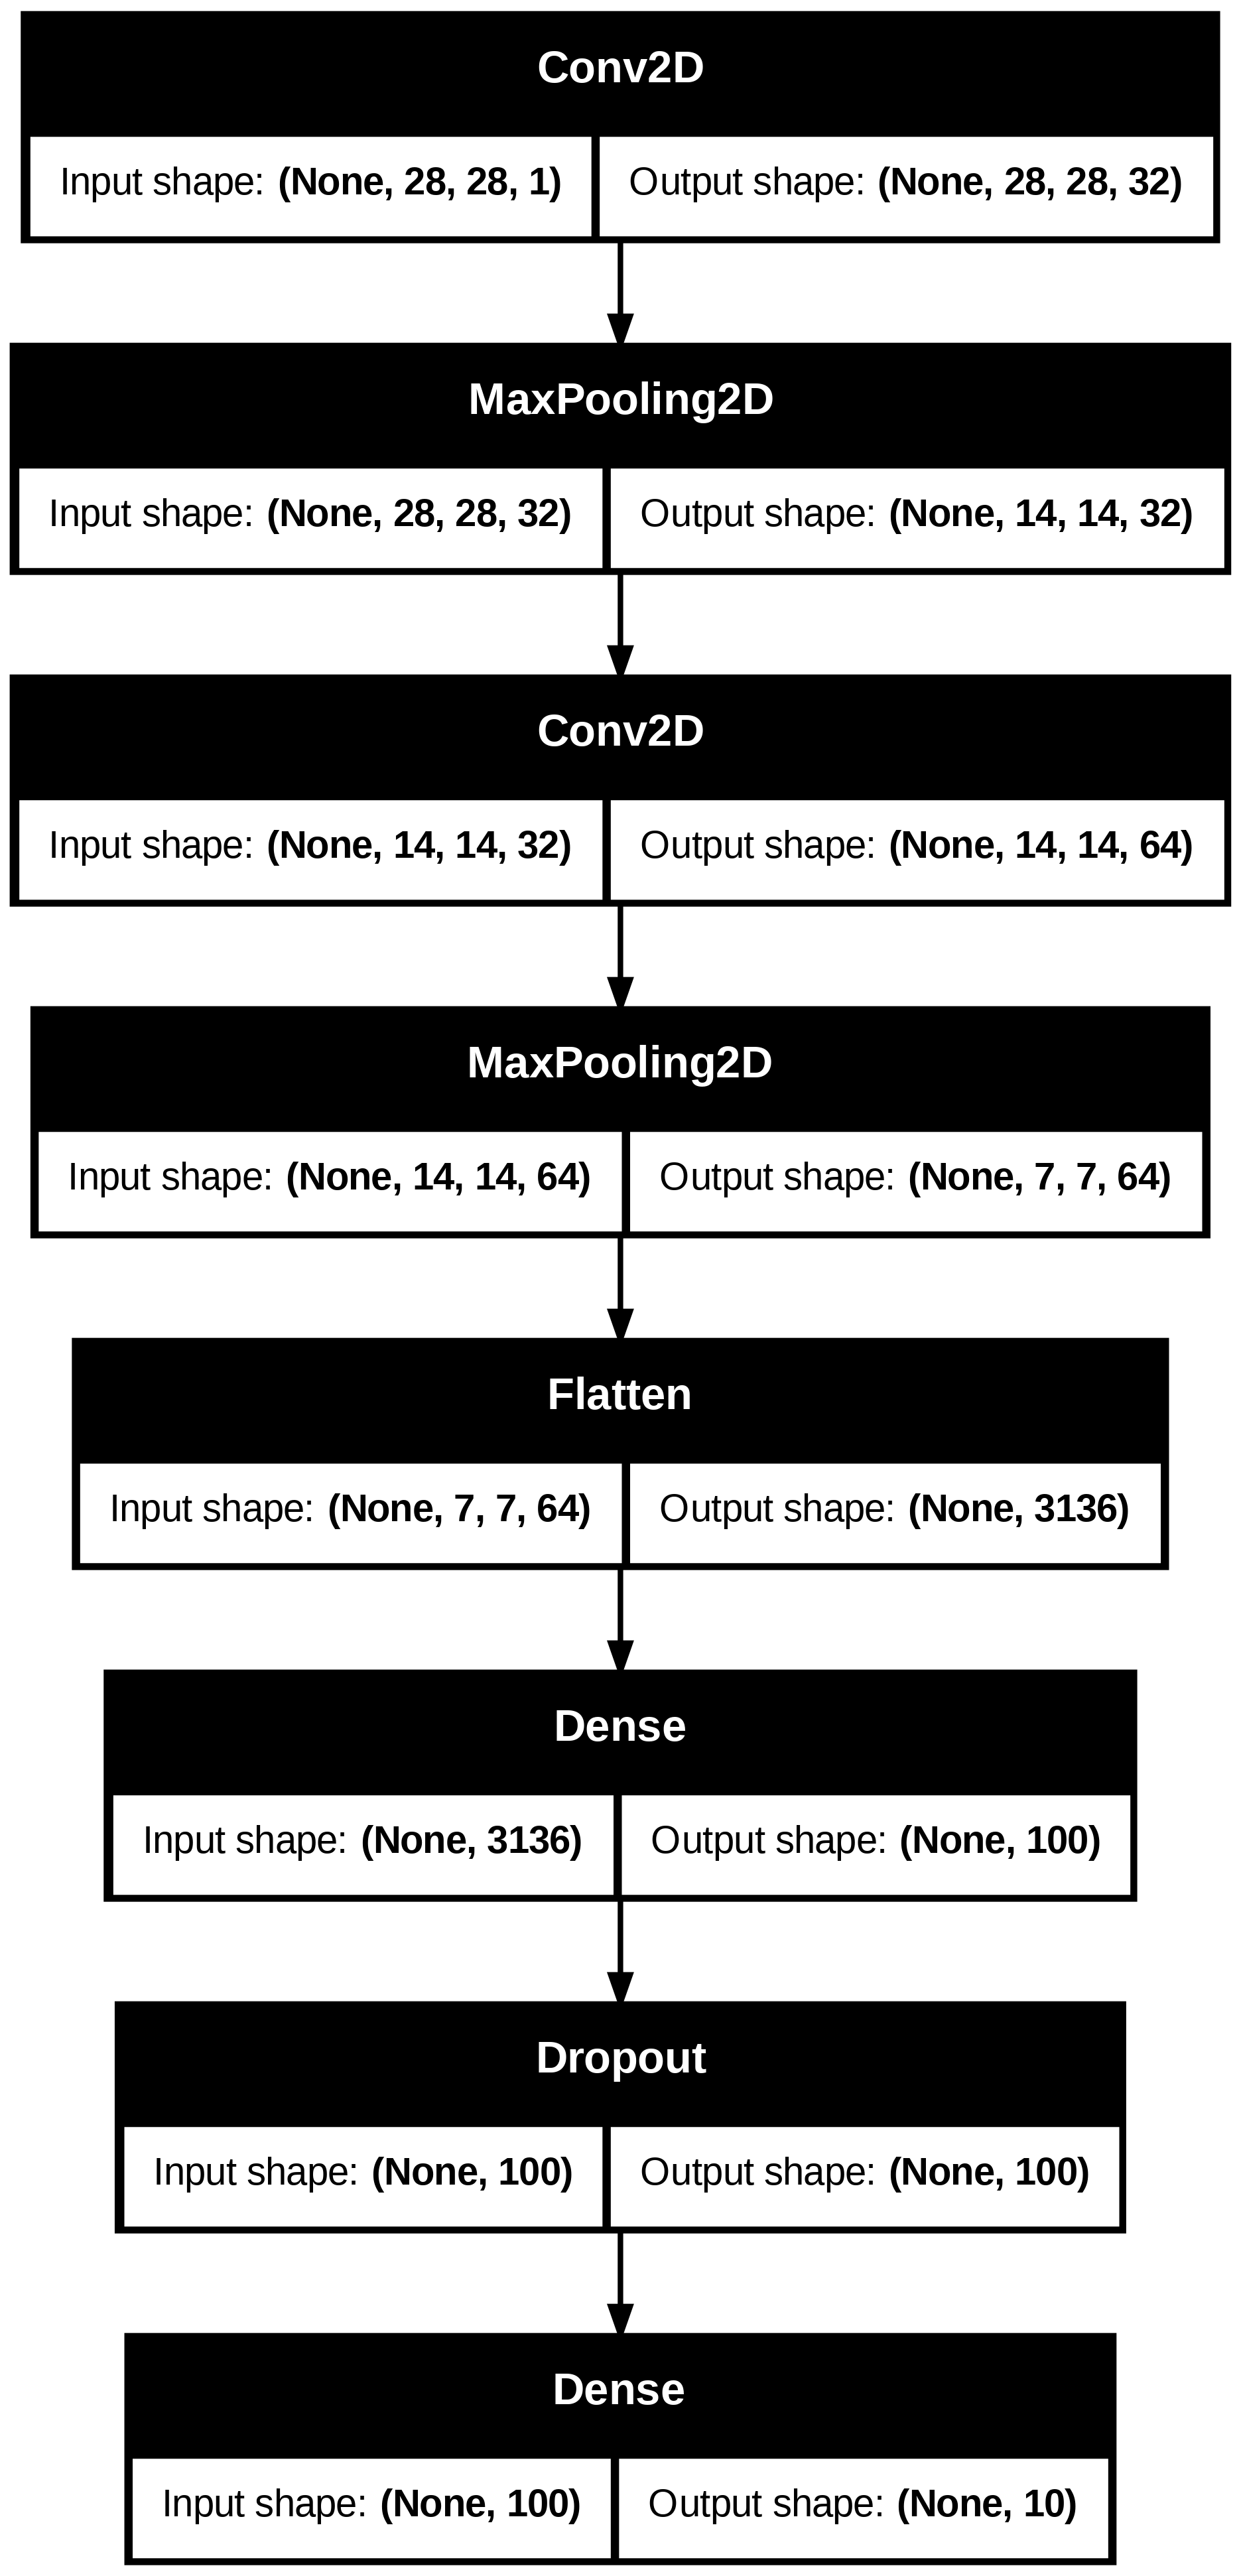

In [13]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

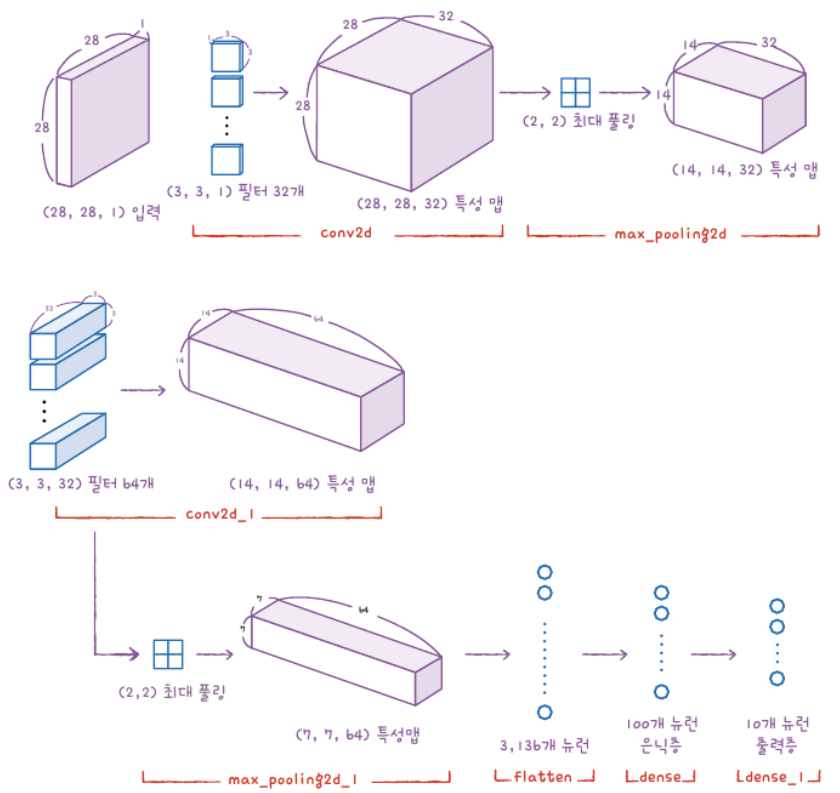

## 모델 컴파일과 훈련

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
    # restore_best_weights: model 객체가 최적의 모델 파라미터로 복원되어 있게 함
    # 즉, ModelCheckpoint 콜백이 저장한 best-cnn-model 파일 다시 읽을 필요 없음
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1482/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.7156

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7429 - loss: 0.7132 - val_accuracy: 0.8817 - val_loss: 0.3208
Epoch 2/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8671 - loss: 0.3621

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8671 - loss: 0.3621 - val_accuracy: 0.8959 - val_loss: 0.2792
Epoch 3/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 0.3013

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8895 - loss: 0.3012 - val_accuracy: 0.9071 - val_loss: 0.2557
Epoch 4/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.2682

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9033 - loss: 0.2682 - val_accuracy: 0.9078 - val_loss: 0.2467
Epoch 5/20
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9104 - loss: 0.2415

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9104 - loss: 0.2415 - val_accuracy: 0.9116 - val_loss: 0.2380
Epoch 6/20
1488/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.2187

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9198 - loss: 0.2188 - val_accuracy: 0.9165 - val_loss: 0.2438
Epoch 7/20
1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9257 - loss: 0.2022

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9256 - loss: 0.2022 - val_accuracy: 0.9197 - val_loss: 0.2263
Epoch 8/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9292 - loss: 0.1877

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9292 - loss: 0.1877 - val_accuracy: 0.9221 - val_loss: 0.2241
Epoch 9/20
1492/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9348 - loss: 0.1788

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9348 - loss: 0.1788 - val_accuracy: 0.9164 - val_loss: 0.2450
Epoch 10/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9367 - loss: 0.1677

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9367 - loss: 0.1677 - val_accuracy: 0.9222 - val_loss: 0.2239
Epoch 11/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9430 - loss: 0.1515

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9430 - loss: 0.1515 - val_accuracy: 0.9244 - val_loss: 0.2221
Epoch 12/20
1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9477 - loss: 0.1394

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9476 - loss: 0.1394 - val_accuracy: 0.9219 - val_loss: 0.2223
Epoch 13/20
1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9471 - loss: 0.1370

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9471 - loss: 0.1370 - val_accuracy: 0.9227 - val_loss: 0.2470


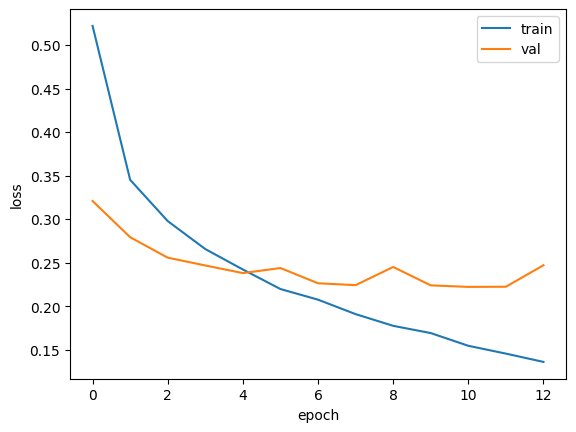

In [15]:
# 조기종료 잘 이루어졌는지 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9240 - loss: 0.2171


[0.22210626304149628, 0.9244166612625122]

predict() 메서드로 훈련된 모델을 사용하여 새로운 데이터에 대해 예측 만들기

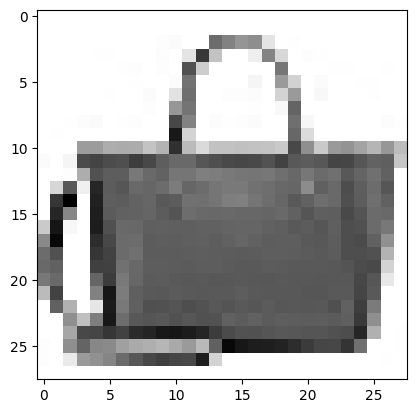

In [17]:
# 편의상 검증 세트의 첫 번째 샘플을 처음 본 이미지라고 가정, 첫 번째 샘플 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
# matplotlib에서는 흑백이미지에 깊이 차원은 없으므로, (28,28,1)을 (28,28)로 바꾸어 출력해야 함
plt.show()

In [18]:
# 10개 클래스에 대한 예측 확률을 출력
preds = model.predict(val_scaled[0:1])
print(preds)
# 9번째는 1, 나머지는 0에 가까움

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
[[6.5659185e-24 7.7364678e-28 7.4432431e-27 1.1626687e-24 6.8877232e-23
  3.8922432e-23 2.3008986e-26 1.7564281e-22 1.0000000e+00 4.6917034e-22]]


val_scaled[0:1]같이 슬라이싱 사용하는 이유:  
케라스 모델이 입력 데이터를 항상 배치(batch) 단위로 처리하며, 입력 텐서의 shape은 보통 (batch_size, height, width, channels) 이므로, 입력이 한 개 뿐이라도 반드시 4차원 텐서로 전달해야 함. 따라서 val_scaled[0:1]로 입력하면 배치 크기가 1로 간주되어 예측 가능.

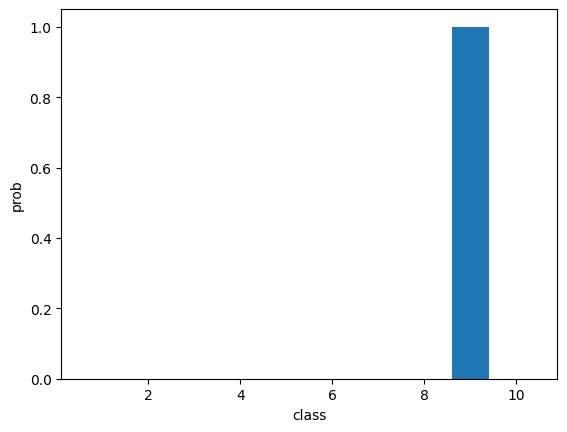

In [19]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [20]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [22]:
import numpy as np
print(classes[np.argmax(preds)])
# preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용

가방


In [23]:
# 맨 처음 떼어놓았던 테스트 세트로 합성곱 신경망의 일반화 성능 가늠해보기
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [24]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9167 - loss: 0.2591


[0.2546338140964508, 0.9146000146865845]